In [4]:
# 딥러닝 프레임워크 tensorflow에서 사용되는 딥러닝 라이브러리 keras를 import한다. keras.datasets 모듈은 Neural Network의 훈련에 사용할 수 있는 7가 데이터셋을 포함한다. 그 중 fashion_mnist 데이터셋을 불러온다. 파이썬에서 수치계산을 위한 numpy와 데이터 시각화를 위한 matplotlib을 import한다.
import keras
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Dense
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

/Users/juyoung/pjs/playWithData/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
# 1. Fashion MNIST 데이터셋 불러오기

# fashion_mnist 모듈은 28x28 픽셀로 이루어진 이미지 데이터셋을 가진다. 이 데이터셋은 총 70,000개의 데이터로 구성되어 있으며 학습 데이터 60,000개, 테스트 데이터 10,000개로 이루어져 있다. 
fashion_mnist = keras.datasets.fashion_mnist
# fashion_mnist 모듈은 데이터셋을 반환하는 load_data() 함수를 포함하는데, load_data() 함수를 호출하면 NumPy array의 tuple을 반환한다. train_images와 train_labels는 Neural Network 모델의 훈련(training)에 사용되고, test_images와 test_labels는 테스트(test)에 사용된다.
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# train_labels는 0에서 9까지의 정수 값을 갖는 array이다. 0에서 9까지의 정수 값은 이미지(옷)의 범주(label)를 나타낸다. 다음 class_names에서 index가 label, 값이 해당 label의 이름을 나타낸다.(예를 들어, index 0의 경우 label은 0, class_name는 'T-shirt/top'이다.)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

60000


In [8]:
print(train_images.shape)
# print("%d" %train_images.shape[0])
# print("%d" %test_images.shape[0])
# print("%d" %train_images.shape[1], train_images.shape[2])
# print("%s" %str(train_labels[:10]))
# print("\n%s" %str(train_images[1]))

(60000, 28, 28)


In [0]:
# 2. matplotlib을 통해 데이터를 이미지로 나타내보기
# 시각화학 전체 그림을 담을 matplotlib의 새로운 Figure 객체를 만든다. 112번째 데이터를 imshow 함수의 인자로 주어 해당 데이터(픽셀 값)을 원하는 색으로 채워서 이미지를 만든다. 
plt.Figure()
plt.imshow(train_images[111])
# 이미지에 컬러바와 격자를 추가한다.
plt.colorbar()
plt.grid(True)

# matplotlib의 새로운 Figure 객체를 만든다. figsize 옵션을 사용해 Figure의 크기를  가로 10 inch, 세로 10 inch로 설정한다. 
plt.figure(figsize=(10,10))
# 총 25개의 이미지를 그린다.
for i in range(25):
    # 하나의 Figure 객체에 여려 개의 이미지를 그리기 위해 subplot 함수를 사용한다. 행의 수 5, 열의 수 5, index는 0부터 24까지 반복문을 통해 i 값을 1씩 증가시킨 결과를 넣어주어 Figure 객체 내에서의 위치를 정해준다.
    plt.subplot(5,5,i+1)
    # xticks(), yticks() 함수는 각각 X축, Y축에 눈금을 표시하는데 가시성을 높이기위해 빈배열을 넣어 tick(눈금)과 label을 모두 지운다.
    plt.xticks([])
    plt.yticks([])
    # train_images의 i번째 이미지를, color map은 cmap 옵션에 binary형태로 설정해준다.
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # x축의 label을 class_names에서 가져온다.
    plt.xlabel(class_names[train_labels[i]])

In [9]:
# 3. 데이터 스케일링하기
# 0에서 255 사이의 값을 갖는 훈련/테스트 데이터들을 0.0~1.0 사이의 값을 갖도록 변환한다. 이러한 정규화가 필요한 이유는 큰 값에 대해서 에러를 보정해가면 목표값에 찾아가기보다는, 적은 값에 대해서 목표값에 도달하는 것이 더 쉽기 때문에 성능을 최적화하는데 도움이 된다.
train_images = train_images / 255.0
test_images = test_images / 255.0

In [6]:
# 4. 모델 구성하기
# Sequential() 클래스를 이용해서 신경망 모델을 순서대로 구성한다.
model=Sequential()
# 입력층 (Input layer)에서 Flatten()을 이용해서 28×28 픽셀의 값을 784개의 1차원 배열로 변환한다. 다음 두 개의 뉴런 층(Neuron layer)은 Dense()를 이용해서 완전 연결된 층(Fully-connected layer)를 구성한다. 각 층은 512개와 10개의 인공 뉴런 노드를 갖고 활성화 함수(activation function)로는 각각 ReLU와 소프트맥스를 사용한다.
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10,activation='softmax'))

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# 5. 모델 컴파일 및 학습하기
# 학습 과정에서 손실 함수(Loss function)를 최적화하기 위해 사용되는 optimizer로는 모멘텀과 RMSProp를 결합한 최적화 알고리즘인 Adam(Adaptive Momentum estimation)을 사용한다. 훈련 과정에서 모델의 오차를 측정하는 손실 함수는 훈련 데이터의 label이 정수 형태이므로 ‘sparse_categorical_crossentropy’를 지정한다. 훈련과 테스트 단계를 평가하기 위한 평가 지표로는 정확도(accuracy)를 사용한다. accuracy’로 설정하면, 이미지를 올바르게 분류한 비율로 모델을 평가한다.
model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

# fit() 메서드에 훈련에 사용할 이미지 데이터와 레이블을 입력한다. 60,000개의 전체 이미지를 몇 번 학습할지 설정하는 epochs 옵션을 통해 총 10번의 에포크동안 학습을 진행한다. batch_size옵션 설정을 통해 64개의 배치 단위로 훈련한다. verbose옵션을 통해 훈련 상황의 출력 방식을  매 반복마다 한 행씩 손실 값과 꼐 컴파일 함수에 지정한 metric의 값을 각 반복의 진행막대와 함께 출력한다.
model.fit(train_images, train_labels, epochs=10, batch_size=64, verbose=1)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7818 - loss: 0.6218
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8671 - loss: 0.3670
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8804 - loss: 0.3282
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8892 - loss: 0.3006
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8937 - loss: 0.2857
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9023 - loss: 0.2629
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9077 - loss: 0.2482
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9085 - loss: 0.2456
Epoch 9/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9162 - loss: 0.2264
Epoch 10/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9188 - loss: 0.2167


In [8]:
# 6. 모델 테스트하기
# model.evaluate()를 이용해서 10,000개의 테스트 샘플에 대해 손실(loss)과 정확도(accuracy)를 평가한다.
test_loss, test_acc = model.evaluate(test_images, test_labels)
# Test accuracy를 출력한다. 
print('Test accuracy:', test_acc)

# predict() 메서드를 사용하면 모델이 각 이미지의 클래스를 예측하는 결과를 확인할 수 있다. predictions는 각 test_images에 대한 신경망의 출력값을 나타내는  array이다. 
predictions = model.predict(test_images)

# 첫번째 예측 predictions[0]을 출력해보면 10개의 값을 갖는 array이며, 입력 이미지 데이터가 열 개의 숫자 중 어떤 숫자일 확률을 의미한다. np.argmax() 함수를 이용해서 가장 높은 값을 갖는 index를 확인한다. 이 index가 바로 해당 데이터가 속하는 범주(label)이다.
print(predictions[0])
print(np.argmax(predictions[0]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 709us/step - accuracy: 0.8841 - loss: 0.3296
Test accuracy: 0.8819000124931335
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step
[5.0735313e-08 1.6312883e-09 2.3434570e-09 5.5925364e-10 3.7618215e-09
 5.5330124e-04 5.0634168e-09 1.2386861e-02 3.3756400e-09 9.8705971e-01]
9


In [10]:
#  CNN사용하기
model2=Sequential([
  keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=16),
  keras.layers.MaxPool2D(strides=(2,2)),
  keras.layers.Flatten(),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(10, activation='softmax')
])
model2.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history=model2.fit(train_images,train_labels,epochs=5,validation_data=(test_images,test_labels))

Epoch 1/5


/Users/juyoung/pjs/playWithData/venv/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8068 - loss: 0.5509 - val_accuracy: 0.8802 - val_loss: 0.3298
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8987 - loss: 0.2763 - val_accuracy: 0.8938 - val_loss: 0.2903
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9150 - loss: 0.2286 - val_accuracy: 0.8900 - val_loss: 0.3170
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9293 - loss: 0.1954 - val_accuracy: 0.8964 - val_loss: 0.2981
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9393 - loss: 0.1680 - val_accuracy: 0.9042 - val_loss: 0.2937


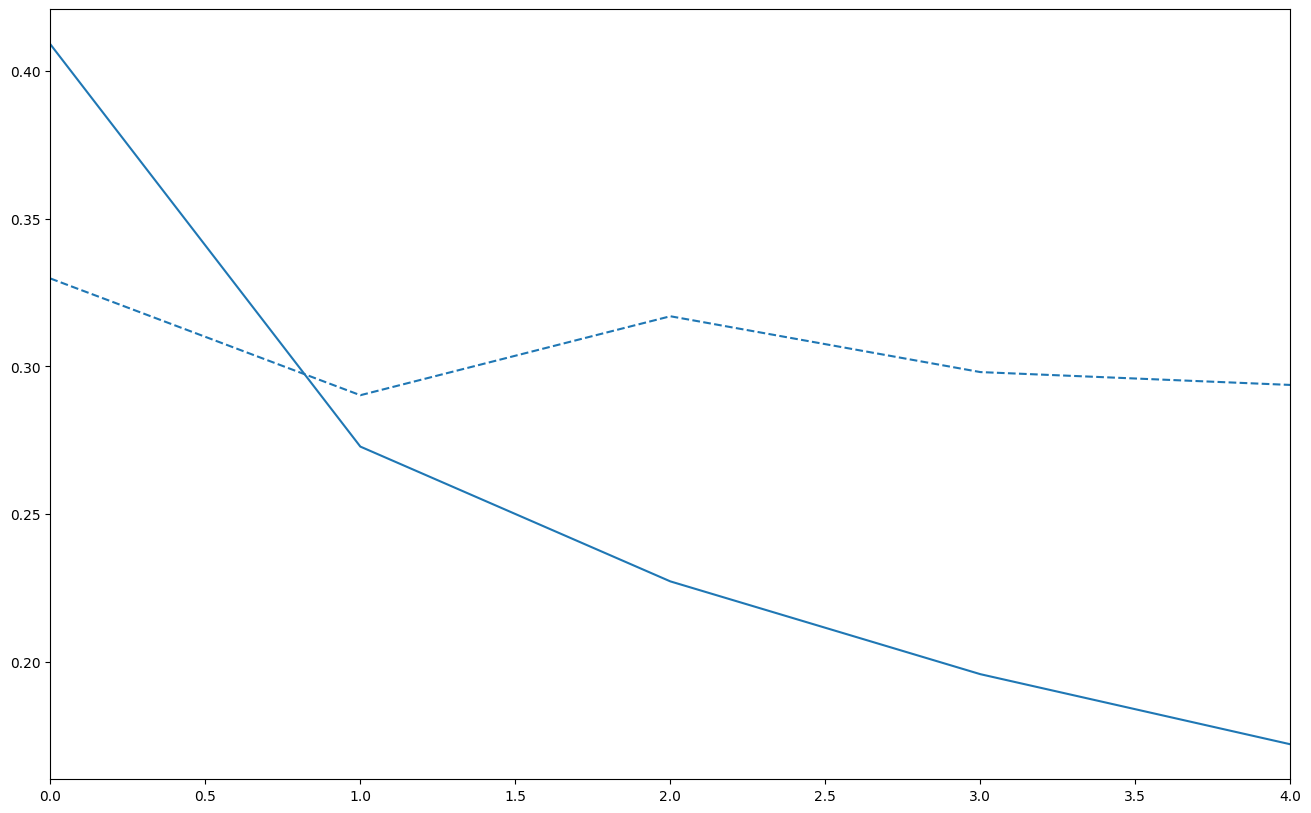

In [11]:
def plot_loss(history):
  plt.figure(figsize=(16,10))
  val=plt.plot(history.epoch,history.history['val_loss'],'--',label="Test")
  plt.plot(history.epoch,history.history['loss'],color=val[0].get_color(),label="Train")
  plt.xlim([0,max(history.epoch)])

plot_loss(history)

In [12]:
def evaluation_model(model2):
  test_loss, test_accuracy = model2.evaluate(test_images,test_labels)
  print('accuracy:', test_accuracy)
evaluation_model(model2)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9018 - loss: 0.3031
accuracy: 0.90420001745224
